# 1. EDA (Analyse exploratrice, visualisation et préparation des données)



In [1]:
# importer les librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import glob
import missingno as msno
import seaborn as sns
import numpy as np

In [2]:
Data = pd.read_csv("aug_train.csv",low_memory=False)

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
def count_percent(data):
  df_cols = pd.DataFrame({'Count Missing': data.isnull().sum(),
                        'Percent Missing': data.isnull().sum()*100/data.shape[0]})
  return df_cols

count_percent(Data)

,Count Missing,Percent Missing
enrollee_id,0,0.000000
city,0,0.000000
city_development_index,0,0.000000
gender,4508,23.530640
relevent_experience,0,0.000000
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885


<AxesSubplot:>

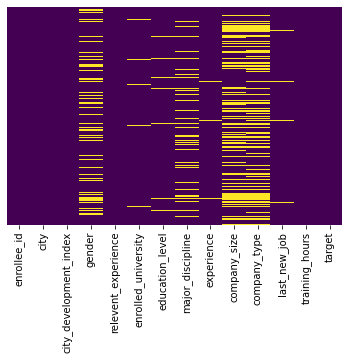

In [5]:
sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
def valuecounts(column):
    valcount = column.value_counts()
    distribution = column.value_counts(normalize=True)*100

    distribution_df = pd.DataFrame({'Count':valcount,
                              'Percent': round(distribution,2)})
    return print(distribution_df,'\n')
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(Data)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 14 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
company_type,6140,32.000000
company_size,5938,31.000000
gender,4508,23.500000
major_discipline,2813,14.700000
education_level,460,2.400000
last_new_job,423,2.200000
enrolled_university,386,2.000000
experience,65,0.300000


<AxesSubplot:>

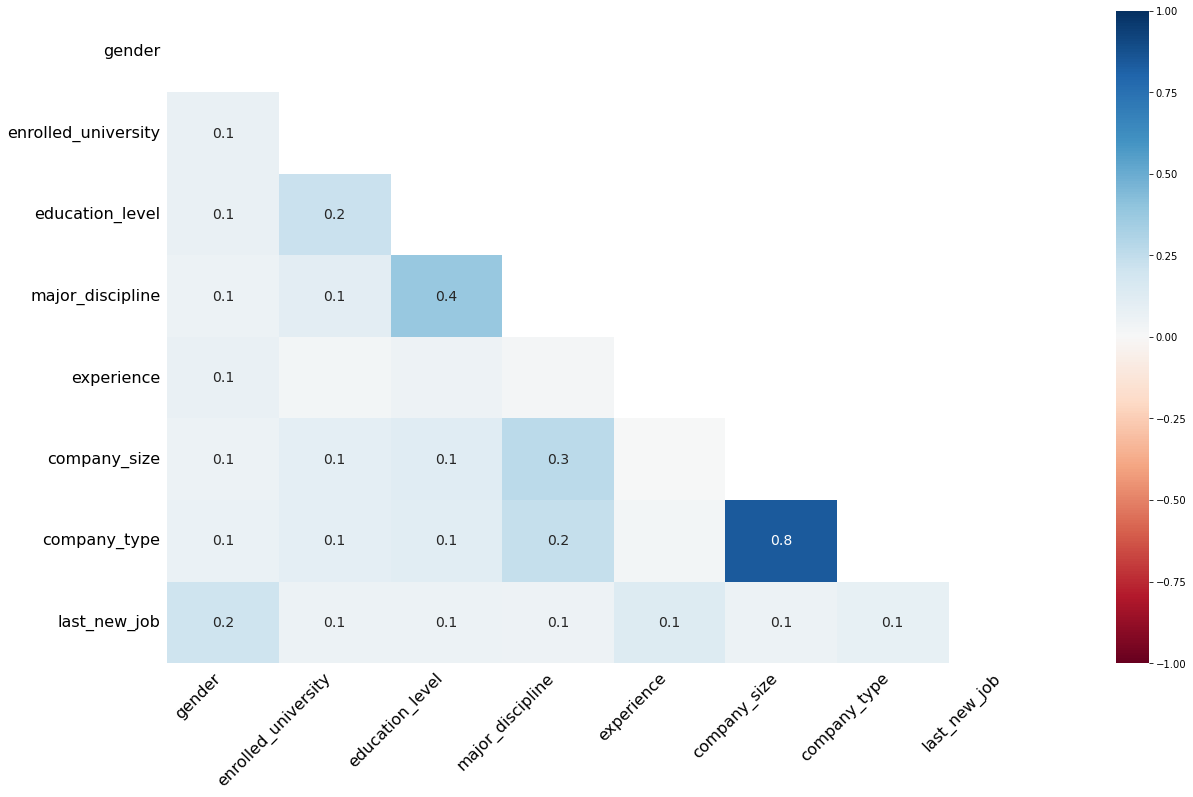

In [7]:
msno.heatmap(Data)

**Removing correlated categorical features**

In [8]:
def drop_corr_col(df_corr):
    upper = df_corr.where(np.triu(np.ones(df_corr.shape),
                          k=1).astype(np.bool))
    # Find index of feature columns with correlation greater than 0.999
    to_drop = [column for column in upper.columns if any(upper[column] > 0.999)]
    return(to_drop)

In [9]:
#creating correlation matrix with absolute values
corr=Data.corr().abs()
#identifying features with high correlation value
to_drop=drop_corr_col(corr)
Data.drop(to_drop,axis=1,inplace=True)
print('Drop following features as they have high correlation other columns:\n',to_drop,'\n')
print('Categorical Features after dropping correlated features:',Data.shape)


Drop following features as they have high correlation other columns:
 [] 

Categorical Features after dropping correlated features: (19158, 14)


C:\Users\achre\AppData\Local\Temp\ipykernel_8904\3187563790.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  k=1).astype(np.bool))


In [10]:
m_cols = count_percent(Data)
print(m_cols[m_cols['Count Missing']>0],'\n')

                     Count Missing  Percent Missing
gender                        4508        23.530640
enrolled_university            386         2.014824
education_level                460         2.401086
major_discipline              2813        14.683161
experience                      65         0.339284
company_size                  5938        30.994885
company_type                  6140        32.049274
last_new_job                   423         2.207955 



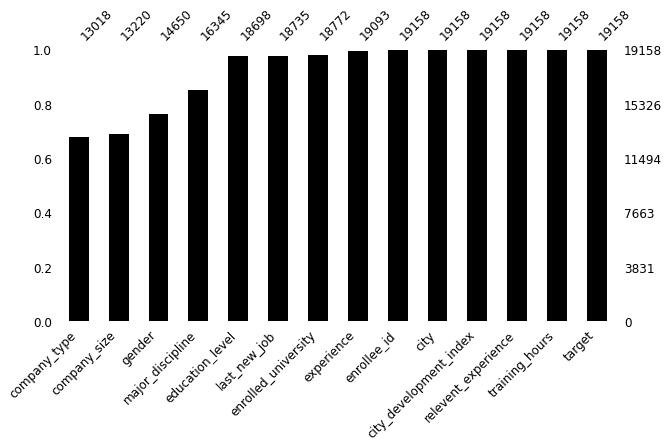

In [11]:

msno.bar(Data,figsize=(10,5),color='black',fontsize=12,sort="ascending",log=False);

(19158, 14)


<AxesSubplot:>

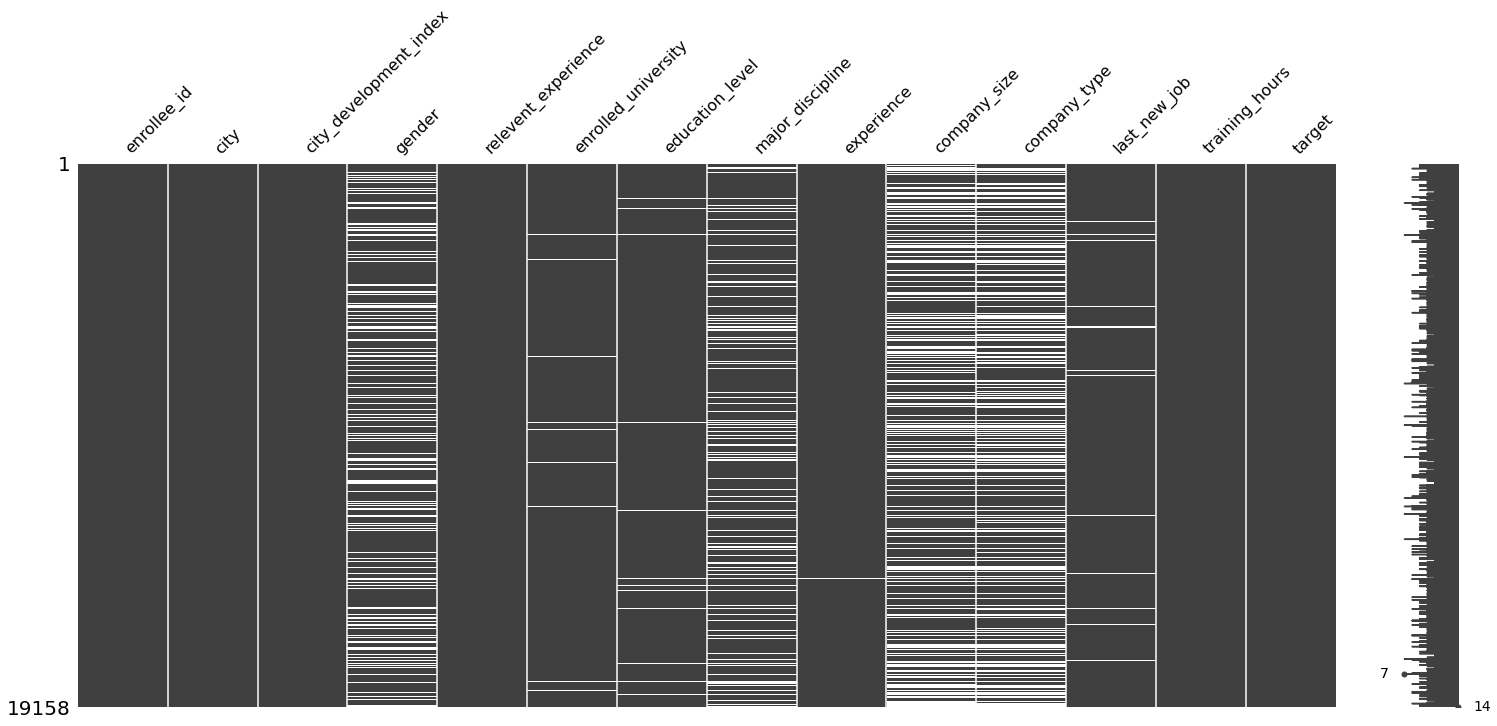

In [12]:
import missingno as msno
print(Data.shape)
msno.matrix(Data)

On se propose d'examiner chacune des variables dans la dataframe, visualiser et faires les transformations nécessaires. 
Des questions surgissent entre temps, concernant les relations qui peuvent avoir lieu entre les variables...Essayer d'y répondre au fur et à mesure.


In [13]:
# 1.Variable: enrollee_id
#Observer combien de valeurs uniques? cette variable représente quoi? conclusion: garder ou supprimer? 
#Cette Valeur représente les Id des candidats
Data["enrollee_id"].count()-Data["enrollee_id"].nunique()
#Data["enrollee_id"].isnull().sum()
Data.drop(['enrollee_id'], axis = 1, inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


<AxesSubplot:>

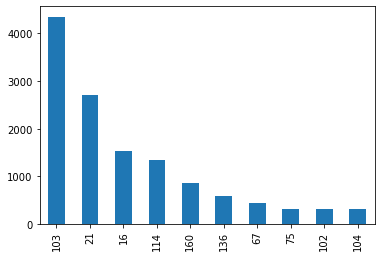

In [14]:
# 2.Variable: city
# Valeurs uniques, le type, comment transformer
Data["city"].nunique()
#Data["city"].count()
# Penser aussi à faire un plot pour observer l'occurence de chaque modalité
Data["city"]=Data["city"].str.lstrip('city_').astype("int")
#Data["city"]
#Data.info()
Data["city"].value_counts().head(10).plot(kind="bar")



In [15]:
# 3.Variable: city_development_index
# Valeurs uniques, le type, comment transformer
Data["city_development_index"].nunique()




93

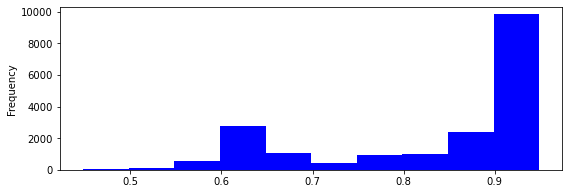

In [16]:
#city_development_index
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3))
plt.hist(Data["city_development_index"], color="blue")
plt.ylabel("Frequency")
plt.show()

C:\Users\achre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\achre\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\achre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\achre\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide

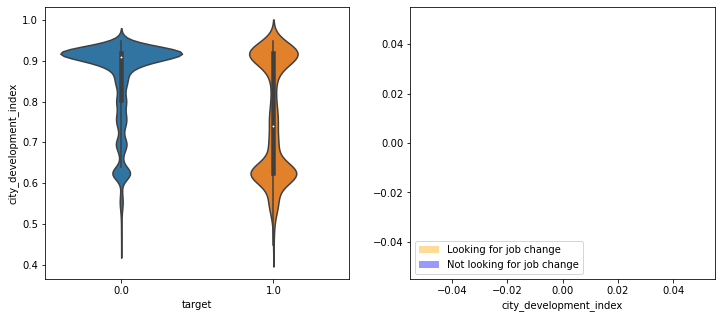

In [17]:
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)


sns.violinplot(x = 'target', y = 'city_development_index', data = Data)
plt.subplot(1,2,2)
sns.distplot(Data[Data['target'] == "Looking for a job change"]['city_development_index'][0:] , label = "Looking for job change", color = 'Orange')
sns.distplot(Data[Data['target'] == "Not looking for job change"]['city_development_index'][0:] , label = "Not looking for job change" , color = 'blue' )

plt.legend()
plt.show()

In [18]:
# Question1: est ce que les variables city et city_development_index sont corrélés? 
column_1 = Data["city"]
column_2 = Data["city_development_index"]
correlation = column_1.corr(column_2)
correlation


0.4106465124579545

In [19]:
# 4.Variable: gender
# Valeurs uniques, le type, comment transformer? pourcentages de valeurs manquantes? les gérer ou laisser pour plus tard? 
Data["gender"]
print("Pourcentages de valeurs manquantes :",(Data["gender"].isnull().sum()*100/Data["gender"].count()),"%")

Pourcentages de valeurs manquantes : 30.77133105802048 %


<AxesSubplot:>

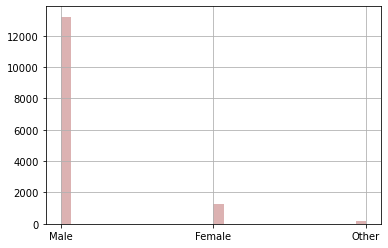

In [20]:
Data['gender'].hist(bins=30,color='darkred',alpha=0.3)

        Count  Percent
Male    13221    90.25
Female   1238     8.45
Other     191     1.30 



C:\Users\achre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


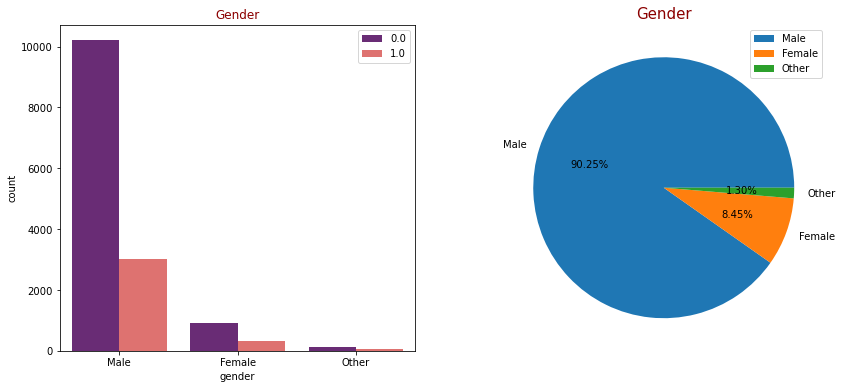

In [21]:
import seaborn as sns
gender = Data["gender"].value_counts()

valuecounts(Data["gender"])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(Data["gender"], hue = "target", data = Data,palette="magma")
plt.title("Gender", color = "darkred")
plt.legend()

plt.subplot(1,2,2)
plt.pie(gender.values, labels=gender.index, autopct='%1.2f%%')
plt.title('Gender',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

In [22]:
import seaborn as sns
gender = Data["gender"].value_counts()
valuecounts(Data["gender"])


        Count  Percent
Male    13221    90.25
Female   1238     8.45
Other     191     1.30 



In [23]:
dummy=pd.get_dummies(Data['gender'])
dummy.head(10)
Data=pd.concat([Data,dummy.iloc[:, 0:2].astype("int")],axis=1)
Data.drop('gender', axis=1, inplace=True)


In [24]:
# 5.Variable: relevent_experience
Data["relevent_experience"]=Data["relevent_experience"].replace('Has relevent experience',1)
Data["relevent_experience"]=Data["relevent_experience"].replace('No relevent experience',0)
Data["relevent_experience"]=Data["relevent_experience"].astype(int)
print(Data["relevent_experience"])
Data.info()
# type, modalités, transformer

0        1
1        0
2        0
3        0
4        1
        ..
19153    0
19154    1
19155    1
19156    1
19157    0
Name: relevent_experience, Length: 19158, dtype: int32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int32  
 1   city_development_index  19158 non-null  float64
 2   relevent_experience     19158 non-null  int32  
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   experience              19093 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target               

   Count  Percent
1  13792    71.99
0   5366    28.01 



C:\Users\achre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


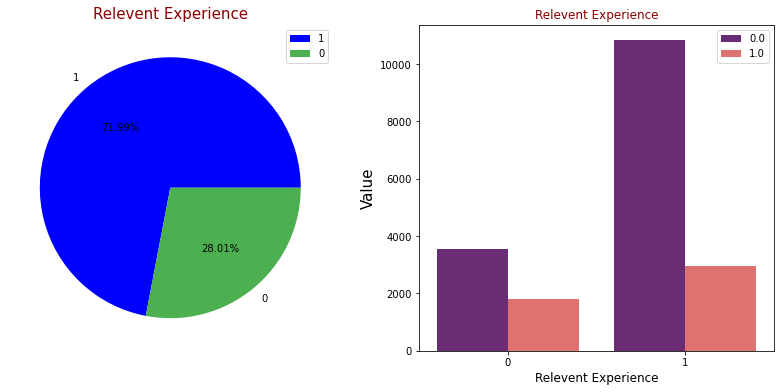

In [25]:
#relevent_experience
experience = Data["relevent_experience"].value_counts()
valuecounts(Data["relevent_experience"])
experience_index = experience.index
experience_values = experience.values
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
colrs= [ "b", "#4CAF50"]
plt.pie(experience_values, labels=experience_index, autopct='%1.2f%%',colors=colrs)
plt.title('Relevent Experience',color = 'darkred',fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
ax= sns.countplot(Data["relevent_experience"], hue = "target", data = Data,palette="magma")
plt.xlabel('Relevent Experience', size = 12, color = "black") 
plt.ylabel('Value', size = 15) 
plt.title('Relevent Experience', color = "darkred")
plt.legend()
plt.show()

In [26]:
# 6.Variable: enrolled_university 


#Data["enrolled_university"]=="yes_enrollment"
Data["enrolled_university"]=Data["enrolled_university"].replace('no_enrollment',0)
Data["enrolled_university"]=Data["enrolled_university"].replace('Full time course',1)
Data["enrolled_university"]=Data["enrolled_university"].replace('Part time course',0.5)

Data["enrolled_university"].fillna(Data["enrolled_university"].mean(), inplace=True)
Data["enrolled_university"]=Data["enrolled_university"].astype("int")
# type, modalités, transformer, valeurs manquantes 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int32  
 1   city_development_index  19158 non-null  float64
 2   relevent_experience     19158 non-null  int32  
 3   enrolled_university     19158 non-null  int32  
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   experience              19093 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
 12  Female                  19158 non-null  int32  
 13  Male                    19158 non-null  int32  
dtypes: float64(2), int32(5), int64(1), obj

In [27]:
Data["enrolled_university"].head(50)

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    1
41    0
42    0
43    0
44    0
45    1
46    0
47    0
48    0
49    0
Name: enrolled_university, dtype: int32

In [28]:
# 7.Variable: education_level 
#Data["education_level"].head(30)

Data["education_level"]=Data["education_level"].replace('Primary School',1)
Data["education_level"]=Data["education_level"].replace('High School',2)
Data["education_level"]=Data["education_level"].replace('Graduate',3)
Data["education_level"]=Data["education_level"].replace('Masters',4)
Data["education_level"]=Data["education_level"].replace('Phd',5)
Data["education_level"] = Data["education_level"].replace(np.nan, Data["education_level"].mean())
Data["education_level"]=Data["education_level"].astype("int")
Data["education_level"].isnull().sum()

0

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int32  
 1   city_development_index  19158 non-null  float64
 2   relevent_experience     19158 non-null  int32  
 3   enrolled_university     19158 non-null  int32  
 4   education_level         19158 non-null  int32  
 5   major_discipline        16345 non-null  object 
 6   experience              19093 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
 12  Female                  19158 non-null  int32  
 13  Male                    19158 non-null  int32  
dtypes: float64(2), int32(6), int64(1), obj

In [30]:
# 8.Variable: major_discipline

#mean=Data["major_discipline"].mean()[0]
#Data["major_discipline"] = Data["major_discipline"].replace(np.nan, mean)
#Data["major_discipline"].isnull().sum()
dummy=pd.get_dummies(Data["major_discipline"])
Data=pd.concat([Data,dummy.iloc[:, 0:5].astype("int")],axis=1)
Data.drop("major_discipline", axis=1, inplace=True)
Data

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,Female,Male,Arts,Business Degree,Humanities,No Major,Other
0,103,0.920,1,0,3,>20,NaN,NaN,1,36,1.0,0,1,0,0,0,0,0
1,40,0.776,0,0,3,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0,0,0,0,0
2,21,0.624,0,1,3,5,NaN,NaN,never,83,0.0,0,0,0,0,0,0,0
3,115,0.789,0,0,3,<1,NaN,Pvt Ltd,never,52,1.0,0,0,0,1,0,0,0
4,162,0.767,1,0,4,>20,50-99,Funded Startup,4,8,0.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,0,0,3,14,NaN,NaN,1,42,1.0,0,1,0,0,1,0,0
19154,103,0.920,1,0,3,14,NaN,NaN,4,52,1.0,0,1,0,0,0,0,0
19155,103,0.920,1,0,3,>20,50-99,Pvt Ltd,4,44,0.0,0,1,0,0,0,0,0
19156,65,0.802,1,0,2,<1,500-999,Pvt Ltd,2,97,0.0,0,1,0,0,0,0,0


In [31]:
# 9.Variable: experience
#Data.groupby('education_level')[['experience']].mean().head()

mode=Data["experience"].mode()[0]
Data["experience"] = Data["experience"].replace(np.nan, mode)
Data["experience"]=Data["experience"].str.replace("<","")
Data["experience"]=Data["experience"].str.replace(">","")
Data["experience"]=Data["experience"].astype("int")
Data["experience"].head()


0    20
1    15
2     5
3     1
4    20
Name: experience, dtype: int32

In [32]:
Data.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,company_type,last_new_job,training_hours,target,Female,Male,Arts,Business Degree,Humanities,No Major,Other
0,103,0.920,1,0,3,20,NaN,NaN,1,36,1.0,0,1,0,0,0,0,0
1,40,0.776,0,0,3,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0,0,0,0,0
2,21,0.624,0,1,3,5,NaN,NaN,never,83,0.0,0,0,0,0,0,0,0
3,115,0.789,0,0,3,1,NaN,Pvt Ltd,never,52,1.0,0,0,0,1,0,0,0
4,162,0.767,1,0,4,20,50-99,Funded Startup,4,8,0.0,0,1,0,0,0,0,0


In [33]:
dummy=pd.get_dummies(Data["company_size"])
dummy.head(10)

,10/49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10
0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1
8,0,0,0,0,1,0,0,0
9,0,0,0,1,0,0,0,0


In [34]:
# 10.Variable: company_size  

Data["company_size"].head(20)
Data["company_size"]=Data["company_size"].replace('<10',1)
Data["company_size"]=Data["company_size"].replace('10/49',1)
Data["company_size"]=Data["company_size"].replace('50-99',1)
Data["company_size"]=Data["company_size"].replace('100-500',2)
Data["company_size"]=Data["company_size"].replace('500-999',2)
Data["company_size"]=Data["company_size"].replace('1000-4999',3)
Data["company_size"]=Data["company_size"].replace('5000-9999',3)
Data["company_size"]=Data["company_size"].replace('10000+',3)
mode=Data["company_size"].mode()[0]
mode
Data["company_size"].fillna(mode,inplace=True)
Data["company_size"] = Data["company_size"].replace(np.nan, mode)
Data["company_size"]=Data["company_size"].astype(int)
Data["company_size"].head()


0    1
1    1
2    1
3    1
4    1
Name: company_size, dtype: int32

C:\Users\achre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\achre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


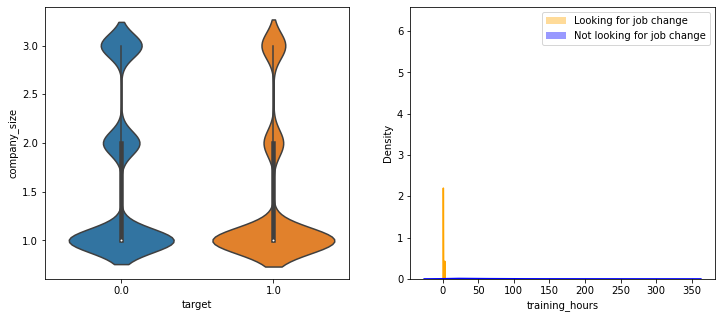

In [35]:
Data["company_size"].head(50)
import seaborn as sns
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'company_size', data = Data)

plt.subplot(1,2,2)
sns.distplot(Data[Data['target'] == 1]['company_size'][0:] , label = "Looking for job change", color = 'Orange')
sns.distplot(Data[Data['target'] == 0]['training_hours'][0:] , label = "Not looking for job change" , color = 'blue' )
plt.legend()
plt.show();

In [36]:
# 11.Variable: company_type
print((Data["company_type"].isnull().sum()/Data["company_type"].count())*100)
Data["company_type"].head(50)
dummy=pd.get_dummies(Data["company_type"])
dummy.iloc[:, 0:5]
Data=pd.concat([Data,dummy.iloc[:, 0:5].astype("int")],axis=1)
Data.drop("company_type", axis=1, inplace=True)
Data



47.16546320479336


,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,Arts,Business Degree,Humanities,No Major,Other,Early Stage Startup,Funded Startup,NGO,Other,Public Sector
0,103,0.920,1,0,3,20,1,1,36,1.0,...,0,0,0,0,0,0,0,0,0,0
1,40,0.776,0,0,3,15,1,>4,47,0.0,...,0,0,0,0,0,0,0,0,0,0
2,21,0.624,0,1,3,5,1,never,83,0.0,...,0,0,0,0,0,0,0,0,0,0
3,115,0.789,0,0,3,1,1,never,52,1.0,...,0,1,0,0,0,0,0,0,0,0
4,162,0.767,1,0,4,20,1,4,8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,0,0,3,14,1,1,42,1.0,...,0,0,1,0,0,0,0,0,0,0
19154,103,0.920,1,0,3,14,1,4,52,1.0,...,0,0,0,0,0,0,0,0,0,0
19155,103,0.920,1,0,3,20,1,4,44,0.0,...,0,0,0,0,0,0,0,0,0,0
19156,65,0.802,1,0,2,1,2,2,97,0.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# 12.Variable: last_new_job

#Data["last_new_job"].head(50)
Data["last_new_job"]=Data["last_new_job"].replace('never',0)
Data["last_new_job"]=Data["last_new_job"].replace('>4',5)
mode=Data["last_new_job"].mode()[0]
Data["last_new_job"] = Data["last_new_job"].replace(np.nan, mode)
Data["last_new_job"]=Data["last_new_job"].astype(int)
Data["last_new_job"].head(50)
print((Data["last_new_job"].isnull().sum()/Data["last_new_job"].count())/100)

0.0


In [38]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int32  
 1   city_development_index  19158 non-null  float64
 2   relevent_experience     19158 non-null  int32  
 3   enrolled_university     19158 non-null  int32  
 4   education_level         19158 non-null  int32  
 5   experience              19158 non-null  int32  
 6   company_size            19158 non-null  int32  
 7   last_new_job            19158 non-null  int32  
 8   training_hours          19158 non-null  int64  
 9   target                  19158 non-null  float64
 10  Female                  19158 non-null  int32  
 11  Male                    19158 non-null  int32  
 12  Arts                    19158 non-null  int32  
 13  Business Degree         19158 non-null  int32  
 14  Humanities              19158 non-null

   Count  Percent
1   8463    44.17
5   3290    17.17
2   2900    15.14
0   2452    12.80
4   1029     5.37
3   1024     5.35 



C:\Users\achre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


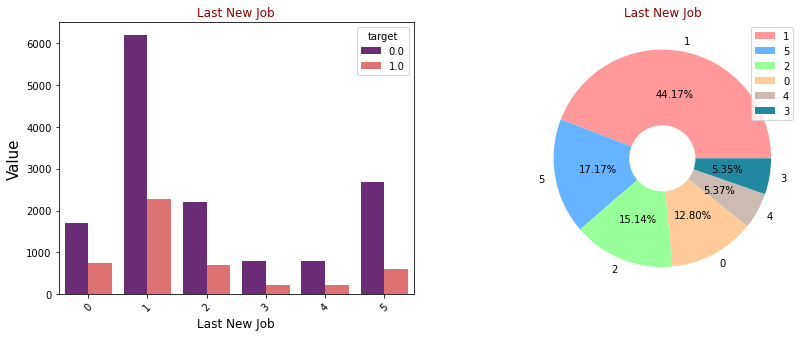

In [39]:
# last_new_job 
last_new = Data["last_new_job"].value_counts()

valuecounts(Data["last_new_job"])

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax= sns.countplot(Data["last_new_job"], hue = "target", data = Data,palette="magma")
plt.xlabel('Last New Job', size = 12, color = "black") 
plt.xticks(rotation = 45)
plt.ylabel('Value', size = 15) 
plt.title('Last New Job', color = "darkred")

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ccbbb2','#22889f']

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.3,color = "white")
plt.pie(last_new.values, labels = last_new.index, colors = colors, autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(circle) 
plt.title("Last New Job", color = "darkred")
plt.legend()
plt.show()

C:\Users\achre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\achre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


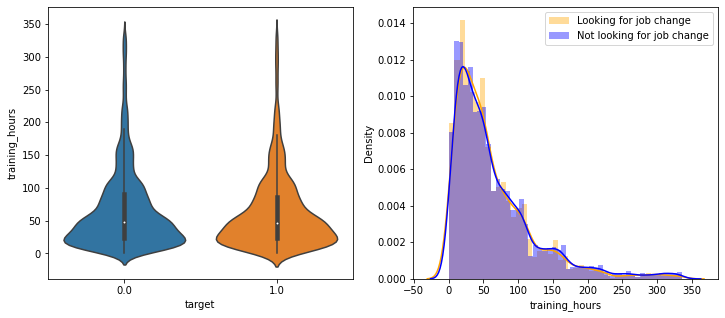

In [40]:
# 13.Variable: training_hours
Data["training_hours"].head(50)
import seaborn as sns
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'training_hours', data = Data)

plt.subplot(1,2,2)
sns.distplot(Data[Data['target'] == 1]['training_hours'][0:] , label = "Looking for job change", color = 'Orange')
sns.distplot(Data[Data['target'] == 0]['training_hours'][0:] , label = "Not looking for job change" , color = 'blue' )
plt.legend()
plt.show();

****Missing values MICE (Multiple Imputation by Chained Equations) 

In [41]:
# 14. Variable: target 
#Examniner la variable target... quel type?  a-t-on une base de donnée équilibrée? 
Data["target"].replace({"Not looking for job change":0.0,  "Looking for a job change":1.0}, inplace=True)
Data["target"].value_counts()
mode=Data["target"].mode()[0]
mode
Data["target"] = Data["target"].replace(np.nan, mode)
Data["target"]=Data["target"].astype(int)
Data["target"]



C:\Users\achre\AppData\Local\Temp\ipykernel_8904\2310410410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["target"].replace({"Not looking for job change":0.0,  "Looking for a job change":1.0}, inplace=True)


0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int32

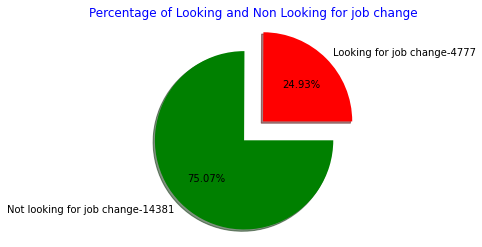

In [42]:
pie_labels=['Looking for job change-'+str(Data['target'][Data.target==1].count()),'Not looking for job change-'+str(Data['target'][Data.target==0].count())]
pie_share=[Data['target'][Data.target==1].count()/Data['target'].count(),
           Data['target'][Data.target==0].count()/Data['target'].count()]
figureObject, axesObject = plt.subplots()
pie_colors=('red','green')
pie_explode=(.3,.0)
axesObject.pie(pie_share,labels=pie_labels,explode=pie_explode,autopct='%.2f%%',colors=pie_colors,startangle=0,shadow=True)
axesObject.axis('equal')
plt.title('Percentage of Looking and Non Looking for job change',color='blue')
plt.show()

C:\Users\achre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


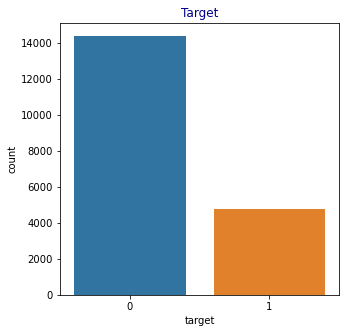

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(Data["target"],  data = Data)
plt.title("Target", color = "darkblue")
plt.show()

Questions diverses où l'on veut comprendre les relations entre différentes variables? 
Penser à faire des plots pour visualiser les réponses aux questions. 
hint: Je vous recommande de créer deux nouvelles colonnes "stay" et "change" qui remplacent la variable target. Ceci est plus commode pour les représentations graphiques qui utilisent le groupby 

In [44]:
dummy=pd.get_dummies(Data['target'])
dummy.rename(columns = {0 : 'stay', 1 : 'change'}, inplace = True)
dummy


,stay,change
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
19153,0,1
19154,0,1
19155,1,0
19156,1,0


In [45]:
Data=pd.concat([Data,dummy.astype("int")],axis=1) 
Data

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,Humanities,No Major,Other,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,stay,change
0,103,0.920,1,0,3,20,1,1,36,1,...,0,0,0,0,0,0,0,0,0,1
1,40,0.776,0,0,3,15,1,5,47,0,...,0,0,0,0,0,0,0,0,1,0
2,21,0.624,0,1,3,5,1,0,83,0,...,0,0,0,0,0,0,0,0,1,0
3,115,0.789,0,0,3,1,1,0,52,1,...,0,0,0,0,0,0,0,0,0,1
4,162,0.767,1,0,4,20,1,4,8,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,0,0,3,14,1,1,42,1,...,1,0,0,0,0,0,0,0,0,1
19154,103,0.920,1,0,3,14,1,4,52,1,...,0,0,0,0,0,0,0,0,0,1
19155,103,0.920,1,0,3,20,1,4,44,0,...,0,0,0,0,0,0,0,0,1,0
19156,65,0.802,1,0,2,1,2,2,97,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
# Combien de gens qui quittent/restent en fonction de leurs origines? 
Data.groupby("city").agg("sum")[["stay", "change"]]

,stay,change
city,,
1,23,3
2,7,0
7,22,5
8,4,0
9,13,5
...,...,...
173,132,19
175,11,3
176,17,7


In [47]:
# La majorité de ceux qui décident de partir appartiennt à des villes avec un development_index élevé ou bas? 
#company_size = df["city_development_index"].value_counts()

#valuecounts(df["city_development_index"])
df=Data.groupby("city_development_index").agg("sum")[["change"]]
df.sort_values(["change"],ascending=[False]).head(10)

,change
city_development_index,
0.624,1597
0.920,1127
0.698,194
0.910,179
0.550,147
0.926,133
0.754,74
0.579,70
0.887,65


In [48]:
# Quelles sont les entreprises où les gens ont le plus tendance de partir? 
df=Data.groupby(["company_size"]).agg("sum")[["change"]]
df.sort_values(["change"],ascending=[False]).head(10)

,change
company_size,
1,3523
3,687
2,567


In [49]:
# Combien de temps restent les gens qui décident de quitter, dans leurs derniers postes?  
Data.groupby(["last_new_job"]).agg("sum")[["change"]]

,change
last_new_job,
0,739
1,2279
2,700
3,231
4,228
5,600


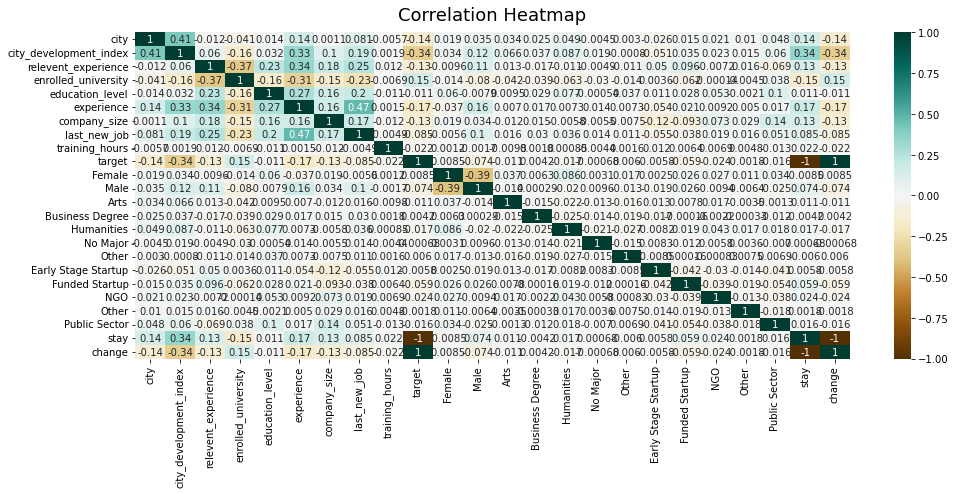

In [50]:
# Penser à dessiner la matrice de correlation (heatmap)
# Quelles conclusions en tirer? 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

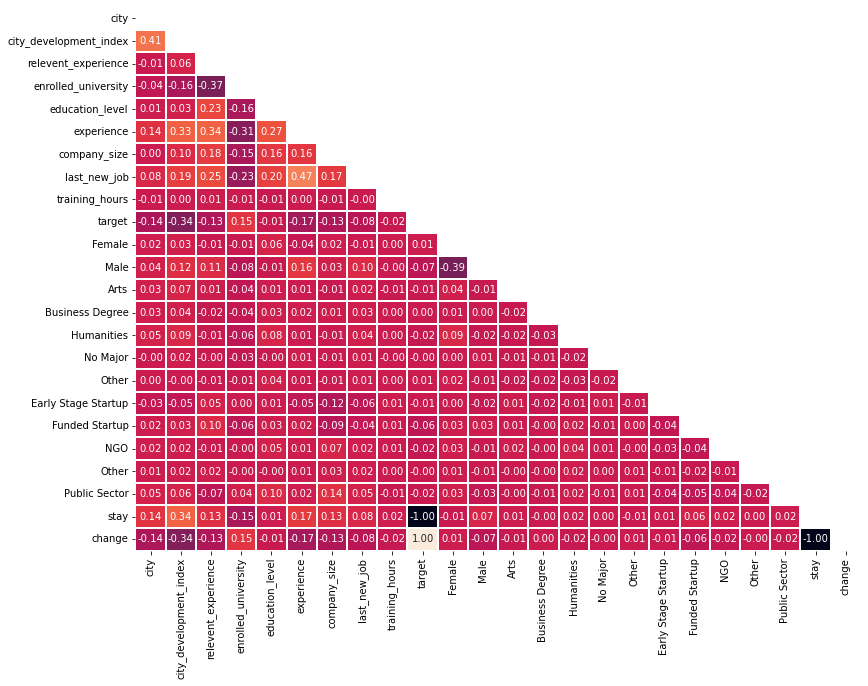

In [51]:
import seaborn as sns
import numpy as np
matrix = np.triu(Data.corr())
plt.figure(figsize=(13, 10))
sns.heatmap(Data.corr(), annot = True, fmt=".2f", mask = matrix,
            vmin = -1, vmax = 1, linewidths = 0.1, linecolor = 'white', cbar = False)
plt.show()

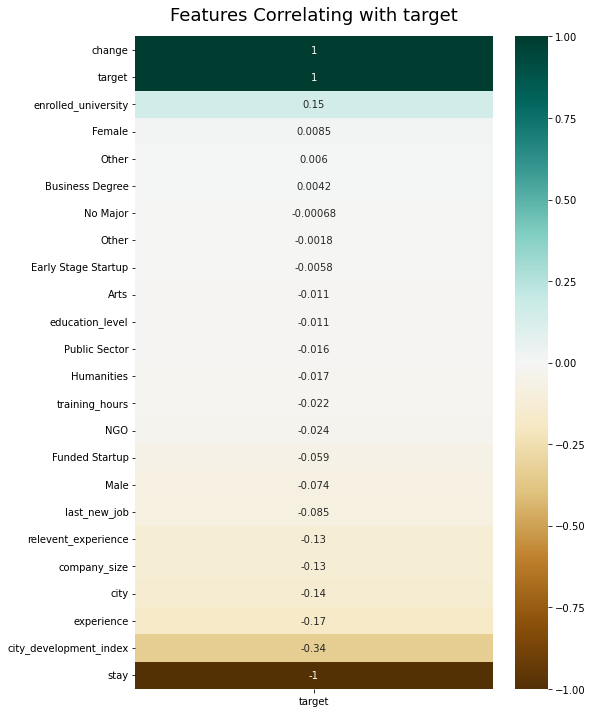

In [52]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(Data.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16);

In [53]:
def outliers(df):
    return df.boxplot(figsize=(30,20))
def histogram(df):
    return df.hist(figsize=(30,20))

C:\Users\achre\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

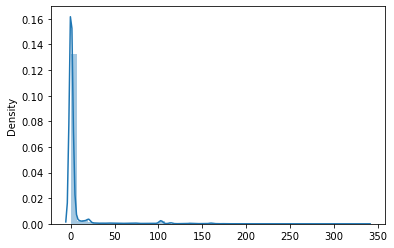

In [54]:
sns.distplot(Data)

# 2. Equilibrer les données


In [55]:
#Train  Test Split 
from sklearn.model_selection import train_test_split
Y = Data['target']
X = Data.drop(columns=['target',"stay","change"])


,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,Female,...,Arts,Business Degree,Humanities,No Major,Other,Early Stage Startup,Funded Startup,NGO,Other,Public Sector
0,0.492781,0.738919,0.623752,-0.493908,-0.195471,1.544672,-0.729294,-0.588135,-0.488985,-0.26284,...,-0.115684,-0.131776,-0.190220,-0.108522,-0.142446,-0.180272,-0.234798,-0.167198,-0.079725,-0.22905
1,-0.864616,-0.428410,-1.603202,-0.493908,-0.195471,0.773150,-0.729294,1.816493,-0.305825,-0.26284,...,-0.115684,-0.131776,-0.190220,-0.108522,-0.142446,-0.180272,-0.234798,-0.167198,-0.079725,-0.22905
2,-1.273990,-1.660590,-1.603202,2.024668,-0.195471,-0.769896,-0.729294,-1.189292,0.293607,-0.26284,...,-0.115684,-0.131776,-0.190220,-0.108522,-0.142446,-0.180272,-0.234798,-0.167198,-0.079725,-0.22905
3,0.751333,-0.323026,-1.603202,-0.493908,-0.195471,-1.387114,-0.729294,-1.189292,-0.222571,-0.26284,...,-0.115684,7.588620,-0.190220,-0.108522,-0.142446,-0.180272,-0.234798,-0.167198,-0.079725,-0.22905
4,1.763994,-0.501368,0.623752,-0.493908,1.269643,1.544672,-0.729294,1.215336,-0.955209,-0.26284,...,-0.115684,-0.131776,-0.190220,-0.108522,-0.142446,-0.180272,4.258974,-0.167198,-0.079725,-0.22905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,2.001000,0.398448,-1.603202,-0.493908,-0.195471,0.618845,-0.729294,-0.588135,-0.389079,-0.26284,...,-0.115684,-0.131776,5.257069,-0.108522,-0.142446,-0.180272,-0.234798,-0.167198,-0.079725,-0.22905
19154,0.492781,0.738919,0.623752,-0.493908,-0.195471,0.618845,-0.729294,1.215336,-0.222571,-0.26284,...,-0.115684,-0.131776,-0.190220,-0.108522,-0.142446,-0.180272,-0.234798,-0.167198,-0.079725,-0.22905
19155,0.492781,0.738919,0.623752,-0.493908,-0.195471,1.544672,-0.729294,1.215336,-0.355778,-0.26284,...,-0.115684,-0.131776,-0.190220,-0.108522,-0.142446,-0.180272,-0.234798,-0.167198,-0.079725,-0.22905
19156,-0.325967,-0.217642,0.623752,-0.493908,-1.660584,-1.387114,0.510661,0.013022,0.526719,-0.26284,...,-0.115684,-0.131776,-0.190220,-0.108522,-0.142446,-0.180272,-0.234798,-0.167198,-0.079725,-0.22905


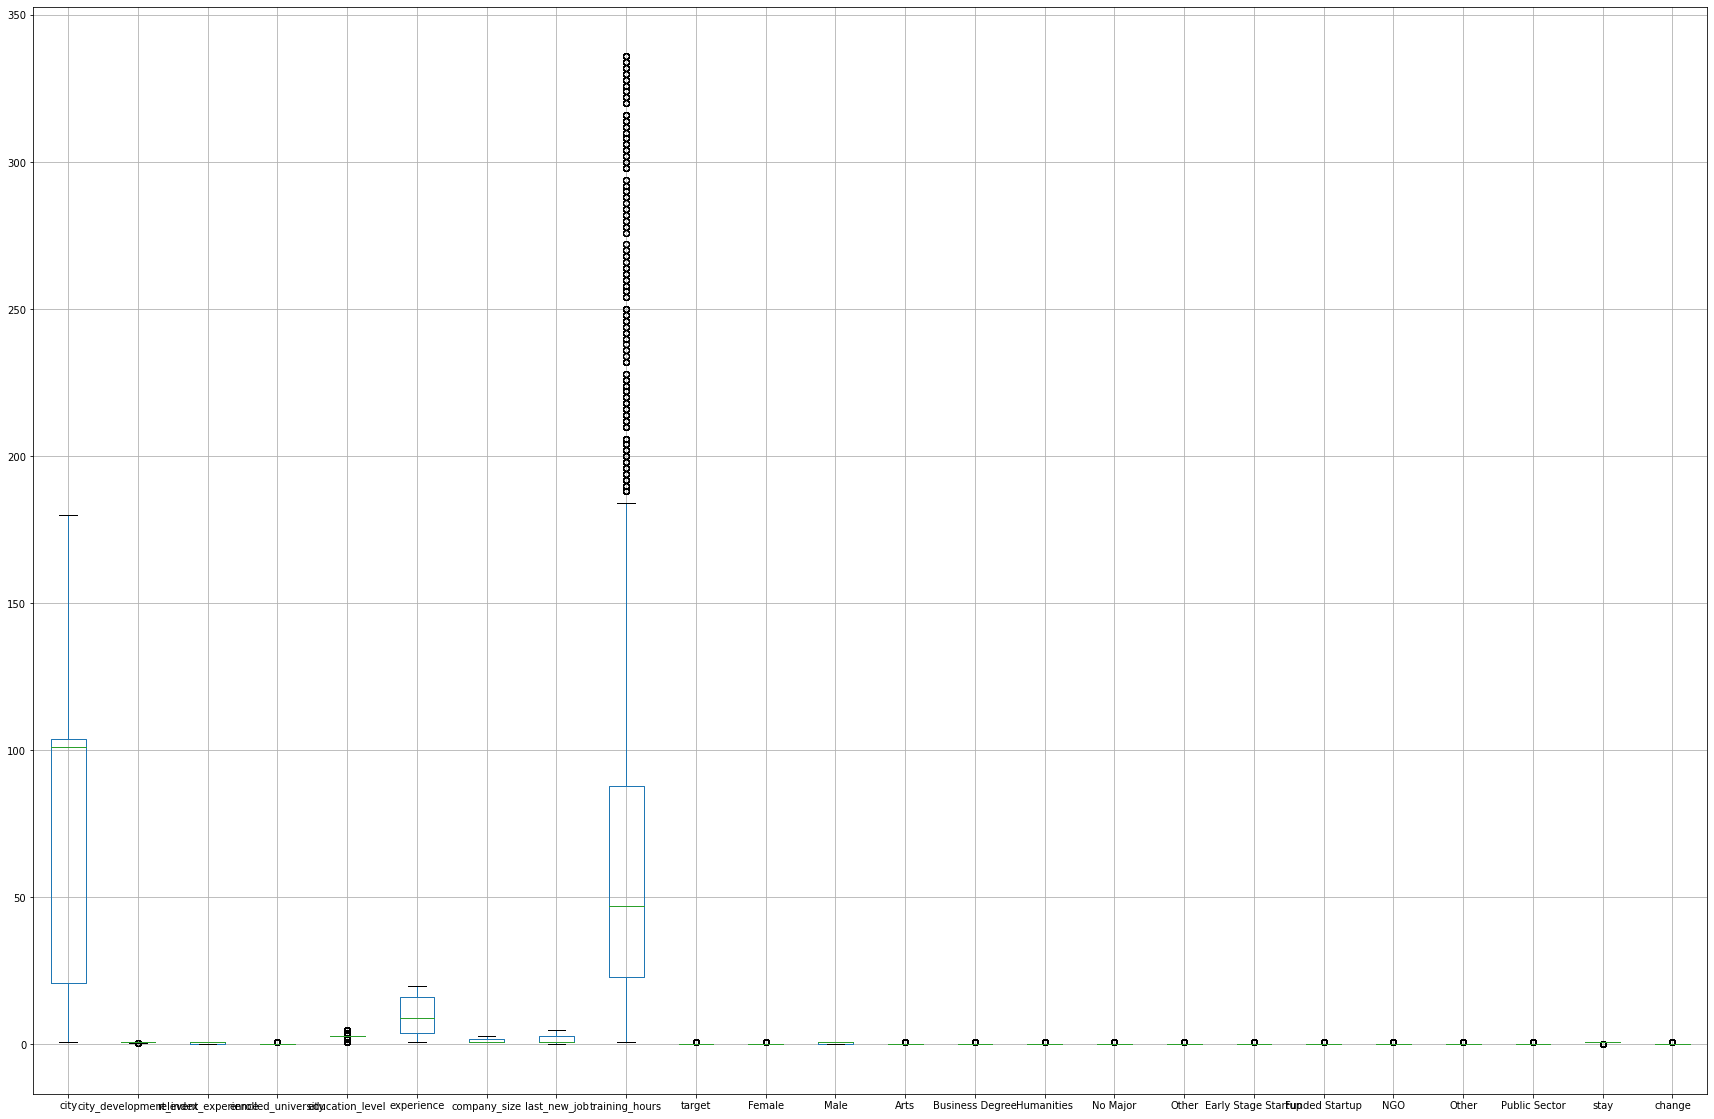

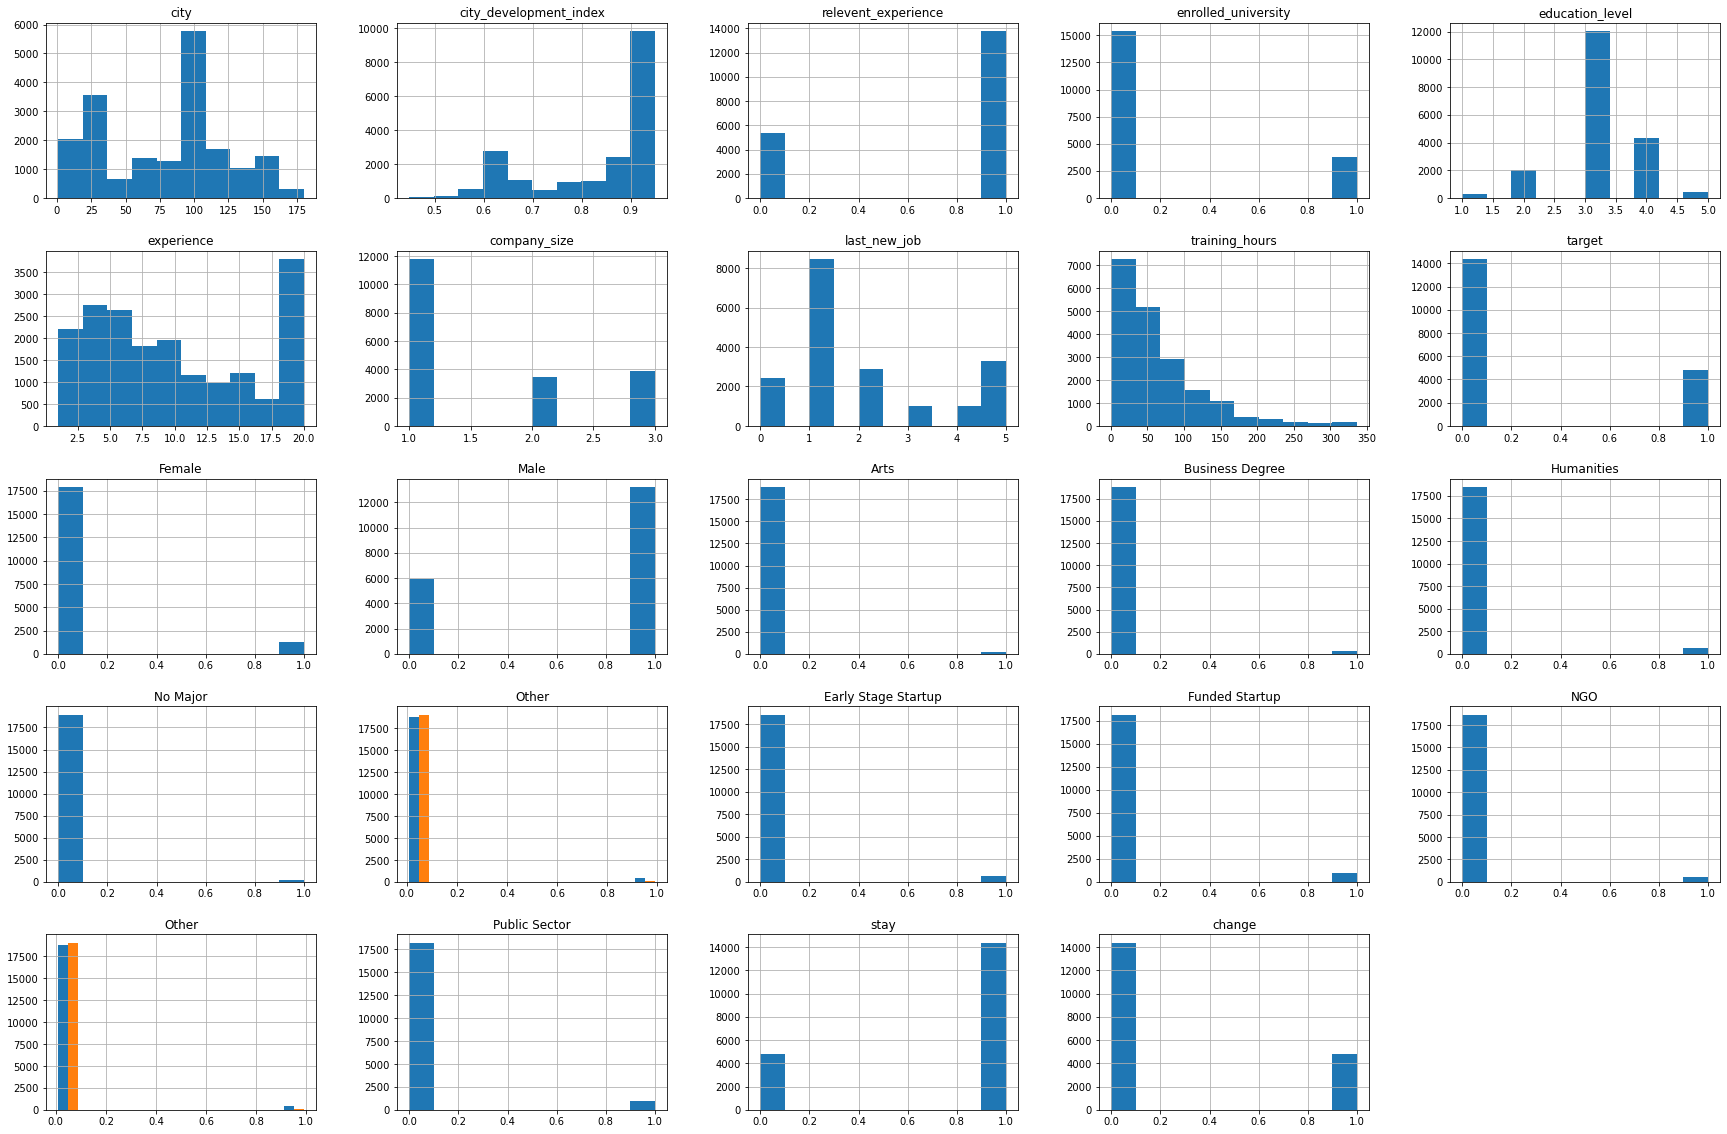

In [56]:
#nahit el moyenne dans les colonnes lkol ou baad neksem aal lecart type 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
outliers(Data);
histogram(Data);
ss=StandardScaler()
X[:]=ss.fit_transform(X)
X

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

C:\Users\achre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

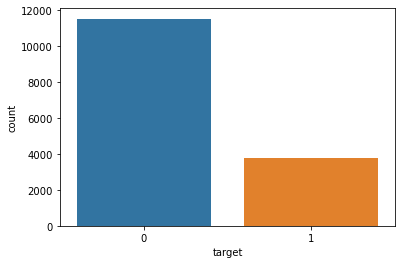

In [58]:
a = sns.countplot(Y_train)
a

In [59]:
import imblearn
smote = imblearn.over_sampling.SMOTE(sampling_strategy=0.7)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

C:\Users\achre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

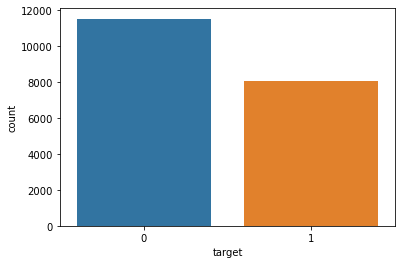

In [60]:
b = sns.countplot(Y_train)
b

# 3. Appliquer les modèles 


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report, plot_confusion_matrix
knn_param_grid = {"n_neighbors": [3,5,7,9,11],
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
#np.linspace(1,19,10, dtype = int).tolist()
knn = KNeighborsClassifier()
search = GridSearchCV(knn, param_grid=knn_param_grid, cv = StratifiedKFold(n_splits = 10), 
                   scoring = "accuracy", n_jobs = -1,verbose = 1)
search.fit(X_train, Y_train)

best = search.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [62]:
#Best model fitting
model = best.fit(X_train,Y_train)
print(best)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')


In [63]:
#Predictions
y_pred_knn = model.predict(X_test)
#Display results
cf_knn = classification_report(Y_test,y_pred_knn)
cm_knn = confusion_matrix(Y_test,y_pred_knn)
acc_knn = accuracy_score(Y_test, y_pred_knn)
f1_knn = f1_score(Y_test,y_pred_knn)

print("Accuracy : ", acc_knn)
print("KNN Model F1-score : ",round(f1_knn, 2))
print("Classification Report :\n\n",cf_knn)
print("Confusion Matrix: \n\n", cm_knn)

Accuracy :  0.691544885177453
KNN Model F1-score :  0.45
Classification Report :

               precision    recall  f1-score   support

           0       0.81      0.76      0.78      2843
           1       0.42      0.50      0.45       989

    accuracy                           0.69      3832
   macro avg       0.62      0.63      0.62      3832
weighted avg       0.71      0.69      0.70      3832

Confusion Matrix: 

 [[2157  686]
 [ 496  493]]


In [61]:
from sklearn.model_selection import learning_curve,cross_val_score
def evaluation(model):
    model.fit(X_train,Y_train.values.ravel())    
    y_pred=model.predict(X_test)
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    cv_scores = cross_val_score(model,X_train, Y_train.values.ravel(),scoring='accuracy',cv=5)
    print("cross validation score=",cv_scores)
    print("ecart type cross validation=",np.std(cv_scores))
    N, train_score, val_score = learning_curve(model, X_train, Y_train.values.ravel(),
                                              cv=5, scoring='accuracy',train_sizes=np.linspace(0.1, 1,5))    
    plt.figure(figsize=(12, 8))
    plt.plot(N, 1-train_score.mean(axis=1), label='train loss')
    plt.plot(N, 1-val_score.mean(axis=1), label='validation loss')
    plt.legend()

In [2]:
def gridSearch(model,params):
    print("For",str(model).split("(")[0])
    grid = GridSearchCV(model, params,scoring='f1' ,cv=5)
    grid.fit(X_train,Y_train.values.ravel())
    print("\n")
    print("Best Parameters : ", grid.best_estimator_)
    print("\n")
    return(grid.best_estimator_)

In [68]:
from sklearn.linear_model import LogisticRegression
params_logistic_regression={'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 10)}
model=gridSearch(LogisticRegression(random_state=123,solver='liblinear', max_iter=5000),params_logistic_regression)


For LogisticRegression


Best Parameters :  LogisticRegression(C=0.000774263682681127, max_iter=5000, random_state=123,
                   solver='liblinear')




[[2290  553]
 [ 425  564]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2843
           1       0.50      0.57      0.54       989

    accuracy                           0.74      3832
   macro avg       0.67      0.69      0.68      3832
weighted avg       0.76      0.74      0.75      3832

cross validation score= [0.70303339 0.70787663 0.70481774 0.6997196  0.69887812]
ecart type cross validation= 0.0033089772556607363


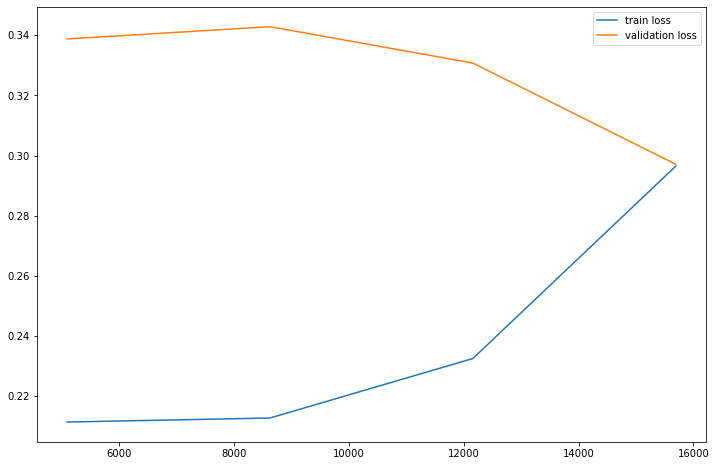

In [69]:
evaluation(LogisticRegression(C=0.000774263682681127, max_iter=5000, random_state=123,
                   solver='liblinear'))

In [70]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
params_random_forest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(params_random_forest)

{'n_estimators': [100, 133, 166, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [71]:
from sklearn.ensemble import  RandomForestClassifier
model=gridSearch(RandomForestClassifier(),params_random_forest)


For RandomForestClassifier


Best Parameters :  RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=166)




[[2511  332]
 [ 543  446]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2843
           1       0.57      0.45      0.50       989

    accuracy                           0.77      3832
   macro avg       0.70      0.67      0.68      3832
weighted avg       0.76      0.77      0.76      3832

cross validation score= [0.70991588 0.71705328 0.72673974 0.72546521 0.71876594]
ecart type cross validation= 0.006104742996299774


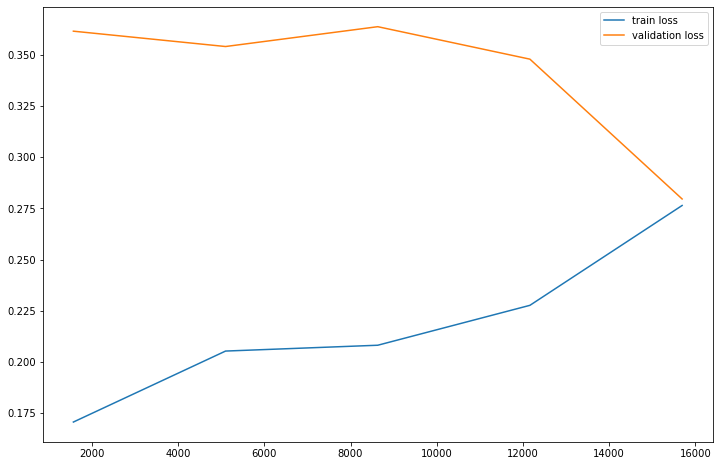

In [72]:

evaluation(RandomForestClassifier(max_depth = 4, min_samples_leaf=2, n_estimators=166))

In [63]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [78]:
model=gridSearch(SVC(),param_grid)

For SVC


Best Parameters :  SVC(C=10, gamma=1)




[[2314  529]
 [ 596  393]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2843
           1       0.43      0.40      0.41       989

    accuracy                           0.71      3832
   macro avg       0.61      0.61      0.61      3832
weighted avg       0.70      0.71      0.70      3832

cross validation score= [0.77109355 0.77032883 0.81493755 0.84782055 0.845487  ]
ecart type cross validation= 0.0340634447959756


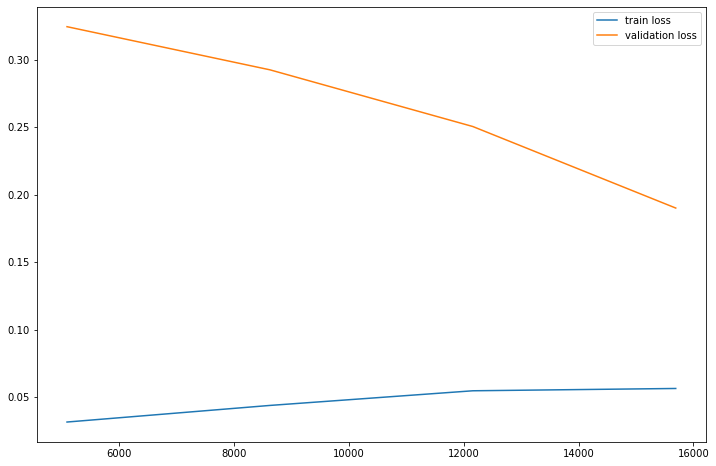

In [65]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report, plot_confusion_matrix
evaluation(SVC(C=10, gamma=1))

#  Conclusion


Le meilleur modele est le random forest avec une précision de 77% avec les paramètres 
RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=166)